In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Perceptron import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
pd.set_option('display.max_rows', 10)
plt.style.use('ggplot')

In [2]:
dados = pd.read_csv("dados.csv", names = ['x1', 'x2', 'x3', 'y'])
X = dados[["x1", "x2", "x3"]]
D = np.asarray([dados["y"].values]).T
Y = np.ones(len(D))
W = np.asarray([[0], [1], [1], [1]])
eta = 0.1

In [3]:
def setAxisLabels(axis, xlabel, ylabel):
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    
def createFigure(size, nRows, nCols):
    return plt.subplots(figsize = size, nrows = nRows, ncols = nCols)

[1, -0.2570444070000013, -1.1886132803599117, -2.120182153719824, 1.1102230246251565e-16, -1.1102230246251565e-16, 6.938893903907228e-17, 1.592699794583395, 1.3754845912443812, 1.1582693879053672, 0.9410541845663533, 0.7238389812273393, 0.5066237778883252, 0.28940857454931124, 0.07219337121029712, -0.0] 


[0.05       0.97261542 1.21183359 0.00414325] 


[ 1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1
  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1
 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1
 -1  1  1  1] 


0.0    100
Name: y, dtype: int64 




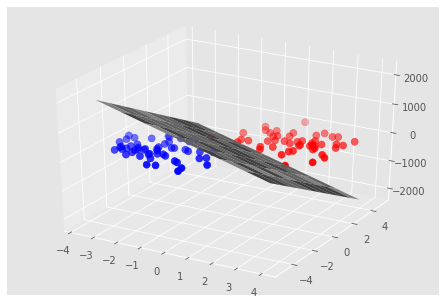

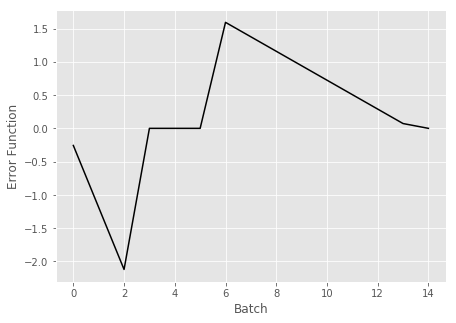

In [4]:
teste = Perceptron()
teste.batchAdjust(X.values, D)
print(teste.Errors,"\n\n")
print(teste.W,"\n\n")
print(teste.predict(X.values),"\n\n")
print((teste.predict(X.values) - dados["y"]).value_counts(), "\n\n")

fig1 = plt.figure()
ax1 = Axes3D(fig1)
point = dados.drop("y", axis = 1).loc[0].values

xx, yy = np.meshgrid(range(-3, 5), range(-5, 5))
z = (-teste.W[1]*xx - teste.W[2]*yy - teste.W[0])*1. / teste.W[3]
surface1 = [xx, yy, z]

C1 = dados.where(dados["y"] > 0).dropna().index
C2 = dados.where(dados["y"] < 0).dropna().index

ax1.scatter(dados["x1"][C1], dados["x2"][C1], dados["x3"][C1], color = "r", s=50)
ax1.scatter(dados["x1"][C2], dados["x2"][C2], dados["x3"][C2], color = "b", s=50)
ax1.plot_surface(xx, yy, z, color = 'grey')

fig2, ax2 = createFigure((7,5), 1, 1)
setAxisLabels(ax2, "Batch", "Error Function")
ax2.plot(np.arange(len(teste.Errors)-1), teste.Errors[1:], 'k')

fig1.savefig("perceptron_BatchDecisionPlane.png")
fig2.savefig("perceptron_BatchErrorFunction.png")

[192.0, 8.0, 0.0] 


[ 0.02        0.12741458  0.16589131 -0.0120127 ] 


[ 1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1
  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1
 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1
 -1  1  1  1] 


0.0    100
Name: y, dtype: int64 




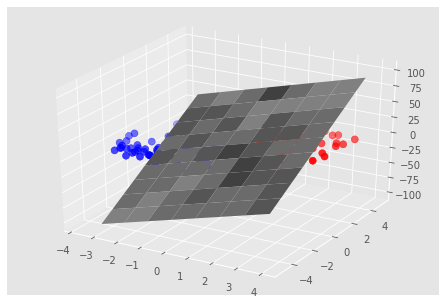

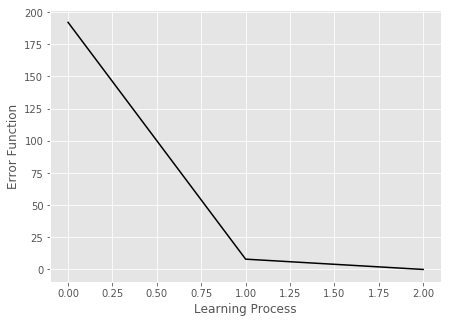

In [5]:
teste = Perceptron()
teste.adjust(X.values, D)
print(teste.Errors,"\n\n")
print(teste.W,"\n\n")
print(teste.predict(X.values),"\n\n")
print((teste.predict(X.values) - dados["y"]).value_counts(), "\n\n")

fig1 = plt.figure()
ax1 = Axes3D(fig1)

xx, yy = np.meshgrid(range(-3, 5), range(-5, 5))
z = (-teste.W[1]*xx - teste.W[2]*yy - teste.W[0])*1. / teste.W[3]
surface2 = [xx, yy, z]

C1 = dados.where(dados["y"] > 0).dropna().index
C2 = dados.where(dados["y"] < 0).dropna().index

ax1.scatter(dados["x1"][C1], dados["x2"][C1], dados["x3"][C1], color = "r", s=50)
ax1.scatter(dados["x1"][C2], dados["x2"][C2], dados["x3"][C2], color = "b", s=50)
ax1.plot_surface(xx, yy, z, color = 'grey')

fig2, ax2 = createFigure((7, 5), 1, 1)
ax2.plot(np.arange(len(teste.Errors)), teste.Errors, 'k')
setAxisLabels(ax2, "Learning Process", "Error Function")

fig1.savefig("perceptron_OnlineDecisionPlane.png")
fig2.savefig("perceptron_OnlineErrorFunction.png")